In [219]:
#Дискретизация аналоговых сигналов
#Вариант 5

In [220]:
import numpy as np
import matplotlib.pyplot as plt

In [221]:
TB = 2
T = int(0.5 * TB)
N = 1000
M = 200

Text(0.5, 1.0, 'Аналоговый сигнал')

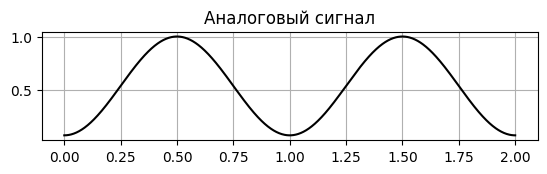

In [222]:
t = np.linspace(0, TB, N)
tm = np.linspace(0, T, int(N/M))
st = 0.54 + 0.46 * np.cos(np.pi * ((2 * t - T) / T))

tt = np.linspace(0, T, N)
l = st

plt.subplot(311)
plt.plot(t, st, "-k")
plt.grid()
plt.title("Аналоговый сигнал")

Text(0.5, 1.0, 'Спектр аналогового сигнала')

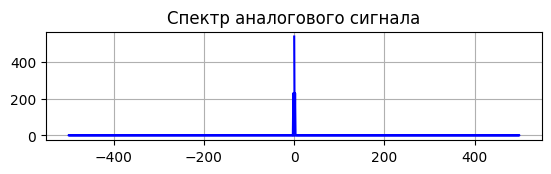

In [223]:
spectrum = np.fft.fft(st)
freq = np.fft.fftfreq(N, d=T/N)

plt.subplot(312)
plt.plot(freq, np.abs(spectrum), "-b")
plt.grid()
plt.title("Спектр аналогового сигнала")

[0.   0.25 0.5  0.75 1.  ]
[0.08       0.91282686 0.39565275 0.40115807 0.90940813]


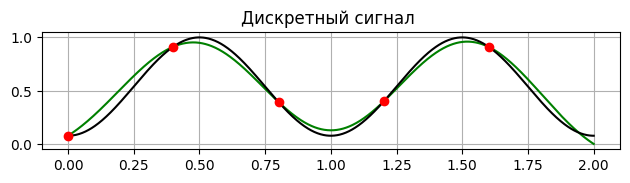

In [224]:
dt = TB / M
Fb = 1 / (t[M])
s = np.zeros(len(t))
x = np.zeros(int(N/M))
tx = np.zeros(int(N/M))
for i in range(int(N/M)):
    #sinc_i = np.sinc(Fb * (t - tm[i]))
    sinc_i = np.sinc(Fb * (t - t[i*M]))
    s += l[i*int(M)] * sinc_i
    x[i] = l[i*int(M)]
    tx[i] = t[i*M]
print(tm)
print(x)
plt.subplot(313)
plt.plot(t, s, "g-")
plt.plot(t, st, "-k")
plt.plot(tx, x, 'or')
plt.grid()
plt.title("Дискретный сигнал ")
#plt.xlim(0, T)
plt.tight_layout()
plt.show()

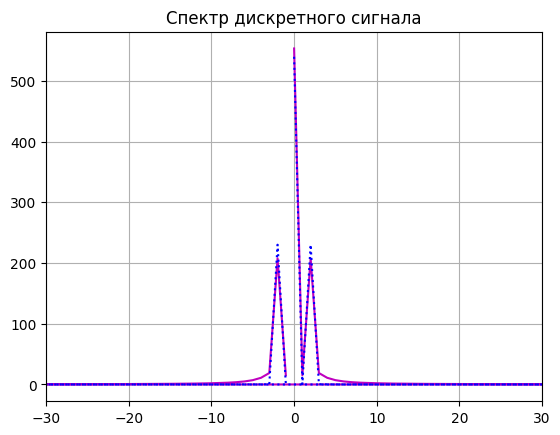

In [225]:
spectrum_filtered = np.fft.fft(s)
freq_filtered = np.fft.fftfreq(N, d=T/N)

plt.figure()
plt.plot(freq_filtered, np.abs(spectrum_filtered), "-m")
plt.plot(freq, np.abs(spectrum), ":b")
plt.xlim(-30, 30)
plt.grid()
plt.title("Спектр дискретного сигнала")
plt.show()